<a href="https://colab.research.google.com/github/viola1106/Python_Note/blob/main/CNN(%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN(Convolutional Neural Network)卷積神經網路

In [1]:
import pandas as pd
import keras
from keras.utils import to_categorical

In [2]:
keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [13]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [14]:
print('x_Train.shape:', x_Train.shape)
print('y_Train.shape:', y_Train.shape)

x_Train.shape: (60000, 28, 28)
y_Train.shape: (60000,)


In [15]:
# 資料視覺化
import matplotlib.pyplot as plt

def plot_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2, 2)
  plt.imshow(image, cmap='binary')
  plt.show()


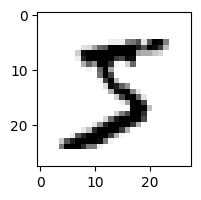

In [7]:
plot_image(x_Train[0])

In [11]:
# 增加顏色維度: 彩色RGB維度是3，黑白是1
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')
x_Train4D.shape

(60000, 28, 28, 1)

In [16]:
# 01縮放(數值縮小到0~1之間): 灰階圖片的數值為0~255之間，將數值縮放到0~1之間
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

# 對類別做one-hot encoding處理: 原本的類別是0~8的數字，轉換之後才可以在model用
y_TrainOnehot = to_categorical(y_Train)
y_TestOnehot = to_categorical(y_Test)

### CNN模型

In [18]:
from keras.models import Sequential  # 載入model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D  # 各種層

model = Sequential()